# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [I Made Riki Widiastana Sanjaya]
- **Email:** [imaderikiwidiastanasanjaya@gmail.com]
- **ID Dicoding:** [rikisanjayaa]

## Menentukan Pertanyaan Bisnis

- apakah ada peningkatan atau penurunan pengguna penyewaan sepeda dari awal bulan (2011 januari) hingga akhir (2012 januari)? dan apa penyebabnya?
- pada pukul berapakah yang memiliki kenaikan total pengguna paling banyak?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- kedua dataset memiliki kolom-kolom yang sama persis kecuali kolom jam `hr` pada hour_df
- semua data direspresentasikan dalam bentuk angka (integer/float) kecuali `dteday` yang berupa string/object

### Assessing Data

dari source data nya, kita diberikan karakteristik dataset nya:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

tapi kita masih perlu menilai dataset secara mandiri untuk menghindari data yg kosong atau salah

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [6]:
print("Duplikasi: ", day_df.duplicated().sum())

Duplikasi:  0


In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df` 

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [10]:
print("Duplikasi: ", hour_df.duplicated().sum())

Duplikasi:  0


In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tidak terdapat duplikasi ataupun NULL Value pada kedua dataset
- terdapat tipe data yang tidak sesuai pada kolom `dteday` yang berupa object
- banyak nilai atau value yang kurang deskriptif seperti angka pada kolom `Season` dan `Yr`

### Cleaning Data

#### Memperbaiki tipe data pada tabel `day_df`

In [12]:
# check tipe data bukan datetime
day_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype 
--------------  ----- 
731 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB


In [13]:
# ubah tipe data object ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
# print hasilnya
day_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 731 entries, 0 to 730
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
731 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 5.8 KB


#### Memperbaiki tipe data pada tabel `hour_df`

In [14]:
# check tipe data bukan datetime
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype 
--------------  ----- 
17379 non-null  object
dtypes: object(1)
memory usage: 135.9+ KB


In [15]:
# ubah tipe data object ke datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
# print hasilnya
hour_df['dteday'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 17379 entries, 0 to 17378
Series name: dteday
Non-Null Count  Dtype         
--------------  -----         
17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 135.9 KB


#### Mengubah value pada kolom `yr` dari 0 atau 1 menjadi 2011 dan 2012

In [16]:
year_map = {
  0: 2011,
  1: 2012,
}

day_df['yr'] = day_df['yr'].map(year_map)
hour_df['yr'] = hour_df['yr'].map(year_map)
hour_df.sample()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
11835,11836,2012-05-13,2,2012,5,8,0,0,0,1,0.56,0.5303,0.64,0.1642,32,124,156


#### membuat dataframe copy dari kedua dataset yang sudah ada untuk mendeskripsikan value dari kolom `season`, `holiday`, `workingday` dan `weathersit` dari angka menjadi string (object)

##### Mengubah `season` dan `weathersit`

In [17]:
day_df['season'].unique()
hour_df['weathersit'].unique()

array([1, 2, 3, 4])

In [18]:
# membuat dict untuk mengubah value angka menjadi string dari keterangan:
# season : season (1:springer, 2:summer, 3:fall, 4:winter)
season_map = {
  "1": "Spring",
  "2": "Summer",
  "3": "Fall",
  "4": "Winter",
}

# weathersit : 
		# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		# - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		# - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		# - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
# karena keterangan weathersit yang terlalu panjang, kita ambil nilai tengah untuk mempersingkat keterangan:
    # - 1: Clear
		# - 2: Cloudy
		# - 3: Light Rain
		# - 4: Heavy Rain
weathersit_map = {
  "1": "Clear",
  "2": "Cloudy",
  "3": "Light Rain",
  "4": "Heavy Rain",
}

# men copy kedua dataset
day_df_alt = day_df.copy()
hour_df_alt = hour_df.copy()

list_of_df = [day_df_alt, hour_df_alt]
list_of_cols = ['season', 'weathersit']

for df in list_of_df:
  for col in list_of_cols:
    # mengubah tipe data dari int ke str
    df[col] = df[col].astype(str)
    # ubah semua data dengan map
    if col == 'season':
      df[col] = df[col].map(season_map)
    else:
      df[col] = df[col].map(weathersit_map)
      

day_df_alt.sample(5)
hour_df_alt.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2581,2582,2011-04-22,Summer,2011,4,11,0,5,1,Light Rain,0.34,0.3333,0.66,0.1940,23,83,106
408,409,2011-01-19,Spring,2011,1,0,0,3,1,Cloudy,0.22,0.2727,0.93,0.0000,0,3,3
5253,5254,2011-08-11,Fall,2011,8,19,0,4,1,Clear,0.74,0.6515,0.35,0.1940,48,323,371
7357,7358,2011-11-08,Winter,2011,11,4,0,2,1,Clear,0.30,0.3333,0.87,0.0000,0,4,4
16230,16231,2012-11-14,Winter,2012,11,0,0,3,1,Clear,0.26,0.2424,0.56,0.2836,4,20,24


##### Mengubah `holiday` dan `workingday`

In [19]:
day_df['holiday'].unique()
day_df['workingday'].unique()

array([0, 1])

In [20]:
# karena kedua kolom ini hanya terdapat value 0 atau 1, 
# kita akan ubah menjadi `True` dan `False` agar lebih jelas lagi

# mengubah tipe data dari int ke boolean 
day_df_alt['holiday'] = day_df_alt['holiday'].astype(bool)
hour_df_alt['holiday'] = hour_df_alt['holiday'].astype(bool)

day_df_alt['workingday'] = day_df_alt['workingday'].astype(bool)
hour_df_alt['workingday'] = hour_df_alt['workingday'].astype(bool)

day_df_alt.sample(5)
hour_df_alt.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4081,4082,2011-06-23,Fall,2011,6,23,False,4,True,Clear,0.70,0.6667,0.74,0.2836,15,90,105
10790,10791,2012-03-30,Summer,2012,3,17,False,5,True,Cloudy,0.40,0.4091,0.62,0.2239,93,513,606
14058,14059,2012-08-13,Fall,2012,8,23,False,1,True,Clear,0.70,0.6515,0.70,0.2239,28,100,128
16480,16481,2012-11-24,Winter,2012,11,10,False,6,False,Cloudy,0.26,0.2273,0.44,0.2985,46,96,142
10658,10659,2012-03-25,Summer,2012,3,5,False,0,False,Cloudy,0.40,0.4091,1.00,0.2537,0,6,6


In [21]:
hour_df_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  bool          
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  bool          
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kita kini memiliki 2 versi dataset yaitu yang `original` dimana hampir semua data direpresentasikan dengan angka serta versi `alt` ketika kita ingin melihat data yang lebih deskriptif
- kolom `dteday` pada semua dataset kini berupa datetime

## Exploratory Data Analysis (EDA)

#### Explore `day_df`

In [22]:
day_df_alt.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
623,624,2012-09-15,Fall,2012,9,False,6,False,Clear,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
526,527,2012-06-10,Summer,2012,6,False,0,False,Clear,0.726667,0.663517,0.538333,0.133721,2224,4374,6598
685,686,2012-11-16,Winter,2012,11,False,5,True,Clear,0.345000,0.347204,0.524583,0.171025,484,5214,5698
11,12,2011-01-12,Spring,2011,1,False,3,True,Clear,0.172727,0.160473,0.599545,0.304627,25,1137,1162
399,400,2012-02-04,Spring,2012,2,False,6,False,Cloudy,0.264167,0.272725,0.779583,0.121896,384,2448,2832


In [23]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [24]:
# melihat corelasi antar numeric value
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


In [25]:
# melihat perbandingan total pengguna pada hari kerja vs weekend
day_df_alt.groupby(by="workingday").agg({
  "cnt": ["max", "min", "mean", "std"]
})

cnt                               
             max  min         mean          std
workingday                                     
False       8714  605  4330.168831  2052.141245
True        8362   22  4584.820000  1878.415583

In [26]:
# melihat perbandingan total pengguna pada tiap musim yang berbeda
day_df_alt.groupby(by="season").agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                                
         max   min         mean          std
season                                      
Fall    8714  1115  5644.303191  1459.800381
Spring  7836   431  2604.132597  1399.942119
Summer  8362   795  4992.331522  1695.977235
Winter  8555    22  4728.162921  1699.615261

In [27]:
# melihat perbandingan total pengguna pada cuaca yang berbeda
day_df_alt.groupby(by="weathersit").agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                               
             max  min         mean          std
weathersit                                     
Clear       8714  431  4876.786177  1879.483989
Cloudy      8362  605  4035.862348  1809.109918
Light Rain  4639   22  1803.285714  1240.284449

In [28]:
# perbandingan total pengguna pada tahun 2011 dan 2012 serta perbulannya
day_df_alt.groupby(by=["yr", "mnth"]).agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                                
            max   min         mean          std
yr   mnth                                      
2011 1     1985   431  1231.903226   372.432665
     2     2927  1005  1721.964286   398.508839
     3     3239   605  2065.967742   550.971716
     4     5312   795  3162.333333  1042.093593
     5     5805  2633  4381.322581   572.927883
     6     5515  3767  4783.733333   444.447812
     7     6043  3285  4559.387097   680.090762
     8     5895  1115  4409.387097   809.852401
     9     5423  1842  4247.266667   965.377251
     10    5511   627  3984.225806  1103.481844
     11    4486  1495  3405.566667   788.249290
     12    3940   705  2816.870968   958.763187
2012 1     4521  1301  3120.774194   872.852134
     2     5062  1529  3556.448276   870.724640
     3     8362  3194  5318.548387  1251.162682
     4     7460  1027  5807.466667  1308.938916
     5     8294  2843  6318.225806  1078.403997
     6     8120  4127  6761.000000   954.204995
     7     8173  4459  6567.967742   867.183736
     8     7865  4549  6919.451613   794.059017
     9     8714  4073  7285.766667   979.160925
     10    8156    22  6414.225806  1941.819400
     11    6852  2277  5088.800000  1129.731198
     12    6606   441  3990.741935  1803.227864

In [29]:
# perbandingan pengguna pada hari holiday
day_df_alt.groupby(by="holiday").agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                                
          max   min         mean          std
holiday                                      
False    8714    22  4527.104225  1929.013947
True     7403  1000  3735.000000  2103.350660

In [30]:
# Registered vs Casual user count
day_df_alt.groupby(by="yr").agg({
  "registered": ["max", "min", "mean"],
  "casual": ["max", "min", "mean"],
})

registered                   casual                 
            max  min         mean    max min         mean
yr                                                       
2011       4614  416  2728.358904   3065   9   677.402740
2012       6946   20  4581.450820   3410   2  1018.483607

#### Explore `hour_df`

perbedaan dataset day_df dengan hour_df ada pada kolom `hr` pada `hour_df`

In [31]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8855,8856,2012-01-09,1,2012,1,19,0,1,1,3,0.20,0.2273,0.93,0.0896,3,187,190
16600,16601,2012-11-29,4,2012,11,11,0,4,1,1,0.36,0.3485,0.37,0.2239,13,150,163
9695,9696,2012-02-13,1,2012,2,22,0,1,1,1,0.26,0.2727,0.56,0.1045,3,99,102
581,582,2011-01-26,1,2011,1,12,0,3,1,3,0.22,0.1970,0.93,0.3284,7,41,48
10018,10019,2012-02-27,1,2012,2,11,0,1,1,1,0.36,0.3333,0.43,0.2537,11,92,103


In [32]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [33]:
# melihat corelasi antar numeric value
hour_df.corr()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.999995,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
dteday,0.999995,1.000000,0.404452,0.865648,0.489808,-0.006161,0.014737,0.001372,-0.003366,-0.014063,0.136074,0.137543,0.010196,-0.074645,0.157821,0.281450,0.277753
season,0.404046,0.404452,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,0.865648,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.489808,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006161,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.014737,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,0.001372,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,-0.003366,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014063,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426


In [34]:
# perbandingan total pengguna dalam jam
hour_df.groupby(by="hr").agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                            
    max min        mean         std
hr                                 
0   283   2   53.898072   42.307910
1   168   1   33.375691   33.538727
2   132   1   22.869930   26.578642
3    79   1   11.727403   13.239190
4    28   1    6.352941    4.143818
5    66   1   19.889819   13.200765
6   213   1   76.044138   55.084348
7   596   1  212.064649  161.441936
8   839   5  359.011004  235.189285
9   426  14  219.309491   93.703458
10  539   8  173.668501  102.205413
11  663  10  208.143054  127.495536
12  776   3  253.315934  145.081134
13  760  11  253.661180  148.107657
14  750  12  240.949246  147.271574
15  750   7  251.233196  144.632541
16  783  11  311.983562  148.682618
17  976  15  461.452055  232.656611
18  977  23  425.510989  224.639304
19  743  11  311.523352  161.050359
20  567  11  226.030220  119.670164
21  584   6  172.314560   89.788893
22  502   9  131.335165   69.937782
23  256   2   87.831044   50.846889

In [35]:
# perbandingan penyewaan sepeda pada tiap cuaca yang berbeda dalam 1 jam
hour_df_alt.groupby(by="weathersit").agg({
  "cnt": ["max", "min", "mean", "std"],
})

cnt                            
            max min        mean         std
weathersit                                 
Clear       977   1  204.869272  189.487773
Cloudy      957   1  175.165493  165.431589
Heavy Rain  164  23   74.333333   77.925178
Light Rain  891   1  111.579281  133.781045

**Insight:**
- banyak faktor yang dapat mempengaruhi total pengguna seperti pada kolom `season`
- dengan `df.corr()` kita bisa melihat korelasi antar numeric value, dari hasilnya bisa kita lihat juga dimana kolom `cnt` atau total pengguna berkorelasi dengan banyak kolom lainnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: apakah ada peningkatan atau penurunan pengguna penyewaan sepeda dari awal bulan (2011 januari) hingga akhir (2012 januari)? dan apa penyebabnya?

In [36]:
day_df_alt.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
630,631,2012-09-22,Fall,2012,9,False,6,False,Clear,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
217,218,2011-08-06,Fall,2011,8,False,6,False,Cloudy,0.716667,0.676154,0.755000,0.228250,1521,2773,4294
408,409,2012-02-13,Spring,2012,2,False,1,True,Clear,0.222500,0.227913,0.411250,0.167283,94,3328,3422
494,495,2012-05-09,Summer,2012,5,False,3,True,Cloudy,0.575000,0.553025,0.744167,0.216412,620,4097,4717
678,679,2012-11-09,Winter,2012,11,False,5,True,Clear,0.361667,0.355413,0.540833,0.214558,709,5283,5992


In [37]:
# menjumlahkan total / cnt dari dataset day_df dan menjadikan total pengguna perbulannya
month_data = day_df_alt.groupby(["mnth", "yr"])["cnt"].sum().reset_index().sort_values(by=["yr", "mnth"])

month_data

,mnth,yr,cnt
0,1,2011,38189
2,2,2011,48215
4,3,2011,64045
6,4,2011,94870
8,5,2011,135821
10,6,2011,143512
12,7,2011,141341
14,8,2011,136691
16,9,2011,127418
18,10,2011,123511


Visualisasi hasil tabel diatas:

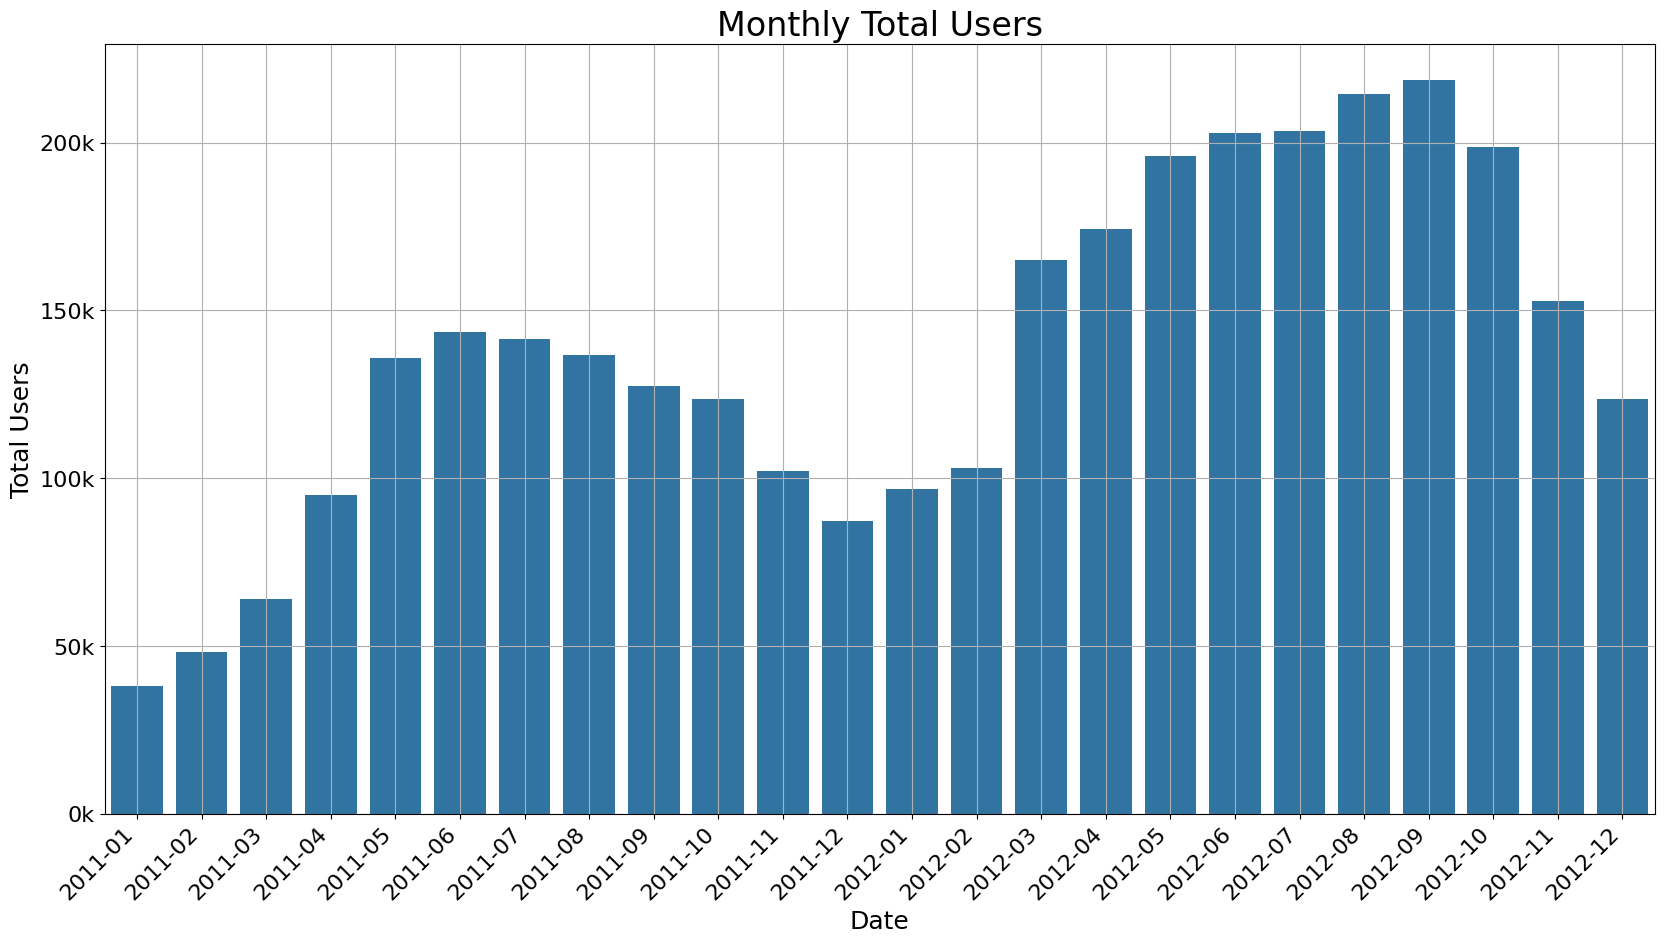

In [54]:

month_data = day_df_alt.groupby(["mnth", "yr"])["cnt"].sum().reset_index().sort_values(by=["yr", "mnth"])

# mengubah format date menjadi YYYY-MM
month_data["date"] = pd.to_datetime(month_data["yr"].astype(str) + "-" + month_data["mnth"].astype(str) + "-01")

# set datetime index
month_data.set_index("date", inplace=True)
month_data.index = month_data.index.strftime("%Y-%m")

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="date", y="cnt", data=month_data, ax=ax)
# rotate date agar lebih terbaca
ax.set_xticks(range(len(month_data)))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
# banyak label yg muncul (24 bulan)
ax.xaxis.set_major_locator(plt.MaxNLocator(24))

# labels dan text format
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Total Users', fontsize=18)
ax.set_title('Monthly Total Users', fontsize=24)
ax.tick_params(axis='y', labelsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.grid(True)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x / 1000:,.0f}k"))

terlihat seperti ada pola pada kenaikan dan penurunan pengguna pada tiap bulannya bukan? apakah kenaikan tsb ada kaitannya dengan musim?

In [39]:
seasonal_data = day_df_alt.groupby(["mnth", "season"])["cnt"].sum().reset_index().sort_values(by=["mnth"])

seasonal_data

,mnth,season,cnt
0,1,Spring,134933
1,2,Spring,151352
2,3,Spring,142065
3,3,Summer,86855
4,4,Summer,269094
5,5,Summer,331686
6,6,Fall,115388
7,6,Summer,230954
8,7,Fall,344948
9,8,Fall,351194


<Figure size 1200x600 with 0 Axes>

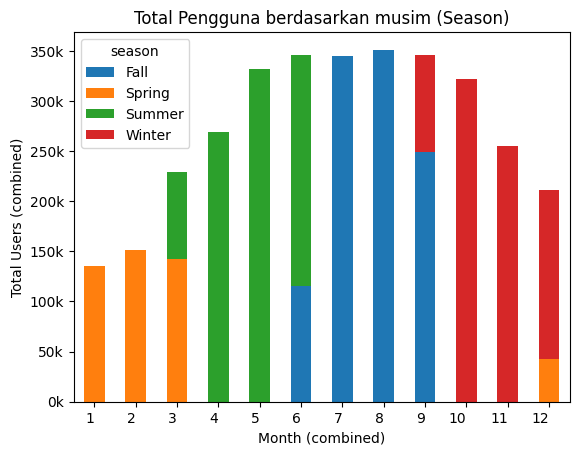

In [51]:
plt.figure(figsize=(12, 6))
seasonal_data.pivot_table(index="mnth", columns=["season"], values="cnt").plot(kind="bar", stacked=True)

# labels dan title
plt.xlabel("Month (combined)")
plt.ylabel("Total Users (combined)")
plt.title("Total Pengguna berdasarkan musim (Season)")
plt.xticks(rotation=0, ha="right")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{x / 1000:,.0f}k"))  # Comma separator for thousands


### Pertanyaan 2: pada pukul berapakah yang memiliki kenaikan total pengguna paling banyak?

In [41]:
hour_df_alt.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2814,2815,2011-05-02,Summer,2011,5,4,False,1,True,Clear,0.44,0.4394,0.77,0.1642,9,8,17
15222,15223,2012-10-01,Winter,2012,10,11,False,1,True,Clear,0.58,0.5455,0.46,0.0000,76,196,272
14641,14642,2012-09-07,Fall,2012,9,6,False,5,True,Clear,0.62,0.5606,0.88,0.1045,5,135,140
12473,12474,2012-06-08,Summer,2012,6,22,False,5,True,Clear,0.68,0.6364,0.41,0.1045,61,230,291
12400,12401,2012-06-05,Summer,2012,6,21,False,2,True,Clear,0.54,0.5152,0.56,0.1642,30,253,283


In [42]:
# rata-rata total pengguna pada tiap jam nya
hourly_data = hour_df_alt.groupby("hr")["cnt"].mean().reset_index()

hourly_data

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


visualisasi tabel diatas:

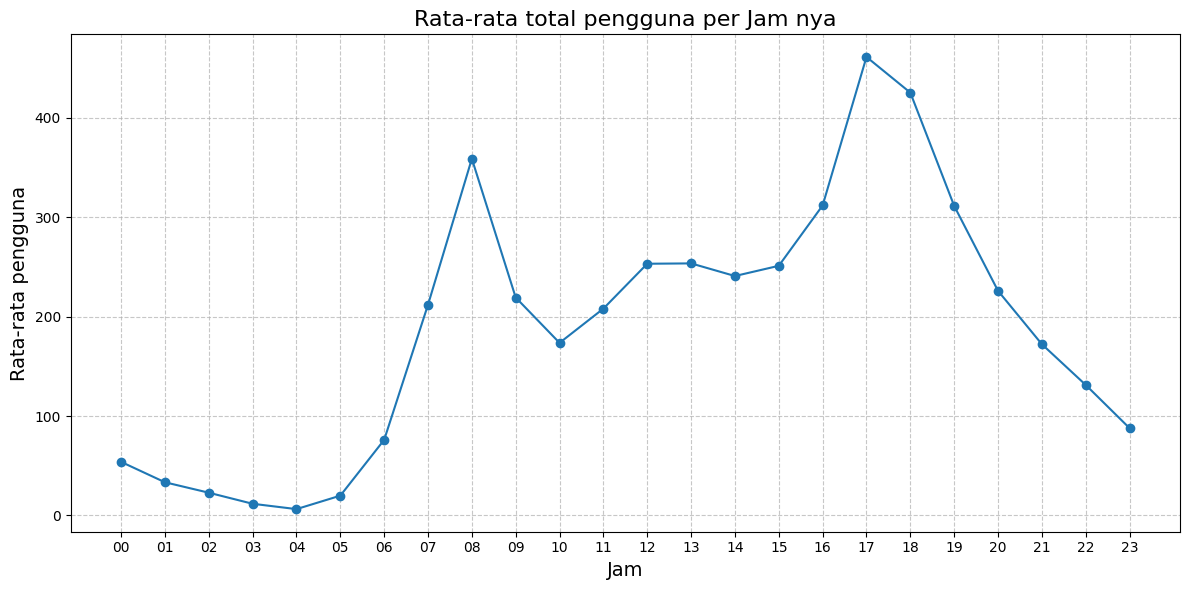

In [43]:
# membuat pivot table
pivot_table = hourly_data.pivot(columns="hr", values="cnt")

# bar chart
plt.figure(figsize=(12, 6))
plt.plot(hourly_data.index, hourly_data["cnt"], marker="o", color="tab:blue", label="Total Users")  # Use tab:blue for colorblind-friendly palette

# labels dan title
plt.xlabel("Jam", fontsize=14)
plt.ylabel("Rata-rata pengguna", fontsize=14)
plt.title("Rata-rata total pengguna per Jam nya", fontsize=16)

# Format x-axis labels to display only the hour
plt.xticks(range(24), [f"{i:02d}" for i in range(24)])

# Add gridlines
plt.grid(linestyle='--', alpha=0.7)

# Annotate a specific point (e.g., peak hour)
peak_hour = hourly_data["cnt"].idxmax()

plt.tight_layout()

**Insight:**
- bisa dilihat dari chart musim diatas, ternyata ketika musim berubah dari `Spring` ke `Summer`, ada `kenaikan pengguna` secara signifikan, begitu juga sebaliknya pada musim `Winter` ke `Spring` ada `penurunan pengguna`.
- dengan adanya visualisasi tabel diatas, kita bisa tahu kebiasaan para pengguna dimana banyak dari mereka yang menggunakan Bike Sharing System ini pada pagi dan sore hari.

## Analisis Lanjutan (Opsional)

### Manual Grouping kolom `hr`

In [44]:
# membuat kolom baru pada dataset hour_df untuk memberi label keterangan waktu yang lebih deskriptif
# Morning = jam 5-12
# Afternoon = jam 12-16
# Evening = jam 17-21
# Night = jam 22-04
hour_df_alt['hour_group'] = pd.cut(hour_df_alt['hr'], bins=[4, 11, 16, 20, 24], labels=['Morning', 'Afternoon', 'Evening', 'Night'])

# inlcude jam 21-23 dan 0-4 sebagai Night
hour_df_alt.loc[(hour_df_alt['hr'] > 21) | (hour_df_alt['hr'] < 5), 'hour_group'] = 'Night'

hour_df_alt.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hour_group
2479,2480,2011-04-18,Summer,2011,4,5,False,1,True,Clear,0.40,0.4091,0.76,0.0896,0,16,16,Morning
15001,15002,2012-09-22,Fall,2012,9,6,False,6,False,Clear,0.56,0.5303,0.83,0.2985,6,35,41,Morning
7961,7962,2011-12-03,Winter,2011,12,9,False,6,False,Clear,0.26,0.2727,0.70,0.1045,25,99,124,Morning
13296,13297,2012-07-13,Fall,2012,7,5,False,5,True,Cloudy,0.66,0.6364,0.56,0.0896,4,30,34,Morning
1655,1656,2011-03-14,Spring,2011,3,13,False,1,True,Clear,0.38,0.3939,0.36,0.3284,24,51,75,Afternoon


In [45]:
# Melihat rata-rata pengguna berdasarkan label dari hour_group
hour_segment_df = hour_df_alt.groupby(by="hour_group", observed=False).agg({
  "cnt": "mean",
}).reset_index()

hour_segment_df.columns = ['hour_group', 'average_user_count']

hour_segment_df

,hour_group,average_user_count
0,Morning,181.520583
1,Afternoon,262.244719
2,Evening,356.201441
3,Night,65.687968


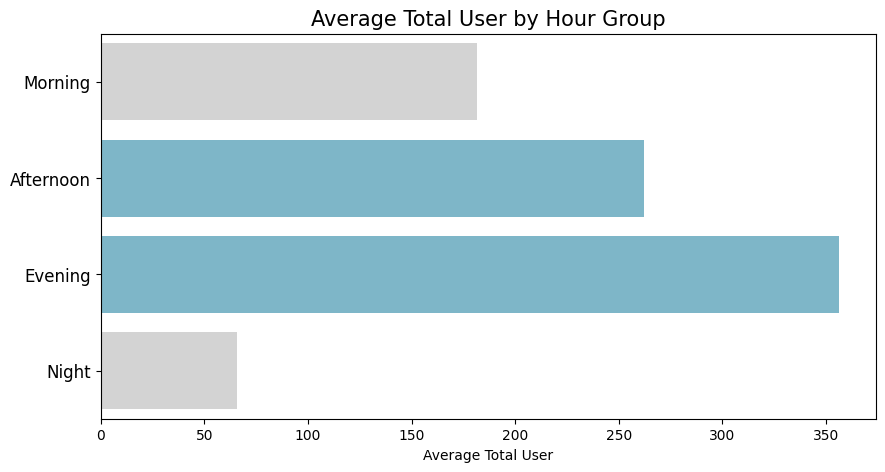

In [46]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#72BCD4"]

sns.barplot(
    x="average_user_count", 
    y="hour_group",
    data=hour_segment_df.sort_values(by="hour_group", ascending=False),
    palette=colors_,
    hue="average_user_count",
    legend=False
)
plt.title("Average Total User by Hour Group", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel("Average Total User")
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Ternyata total pengguna sangat dipengaruhi oleh banyak faktor dari kolom-kolom yang ada, salah satunya adalah `season` atau musim. ketika musim mulai dingin dan hujan serta salju mulai turun, total pengguna pun juga ikut mengalami penurunan
- Conclution pertanyaan 2: kenaikan total pengguna sepertinya konsisten terjadi pada pukul `6 hingga 8 pagi`, kemudian terjadi penurunan dan pada akhirnya naik lagi hingga puncaknya pada pukul `5 sore` hari (17.00) yang menunjukkan `kebiasaan pengguna` Bike Sharing System ini.